**Projet Ai**


# Install necessary libraries


In [ ]:
!pip install PyPDF2 spacy nltk scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Import libraries
import PyPDF2
import re
import spacy
from spacy.training import Example
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import wordnet
from nltk.metrics import edit_distance
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
# Download NLTK data (for wordnet)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Extract text from PDF

In [ ]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ""
        for page in pdf_reader.pages:
            text += page.extract_text()
    return text

pdf_text = extract_text_from_pdf("PMBOK.pdf")

In [ ]:
with open("PMBOK.txt","w") as text_file:
    text_file.write(pdf_text)
print("Text extracted and saved to PMBOK.txt")

Text extracted and saved to PMBOK.txt


# Clean and Normalize the Text


In [ ]:
def clean_text(text):
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

In [ ]:
with open("PMBOK.txt", "r") as file:
    raw_text = file.read()

cleaned_text = clean_text(raw_text)

with open("PMBOK_cleaned.txt", "w") as cleaned_file:
    cleaned_file.write(cleaned_text)
print("Text cleaned and saved to PMBOK_cleaned.txt")

Text cleaned and saved to PMBOK_cleaned.txt


# POS Tagging and Chunking




In [ ]:
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

In [ ]:
def chunking(text):
    doc = nlp(text)
    chunks = [(chunk.text, chunk.label_) for chunk in doc.noun_chunks]
    return chunks

In [ ]:
pos_tags = pos_tagging(cleaned_text)
noun_chunks = chunking(cleaned_text)

In [ ]:
print("POS Tags:", pos_tags[:10])
print("Noun Chunks:", noun_chunks[:10])

POS Tags: [('and', 'CCONJ'), ('the', 'DET'), ('st', 'PROPN'), ('a', 'PROPN'), ('alt2nd', 'PROPN'), ('a', 'DET'), ('alt2rd', 'PROPN'), ('for', 'ADP'), ('project', 'NOUN'), ('m', 'PROPN')]
Noun Chunks: [('the st a', 'NP'), ('a alt2rd', 'NP'), ('project', 'NP'), ('a g alt1 u alt1ide', 'NP'), ('the project', 'NP'), ('a alt2n', 'NP'), ('a alt2gement', 'NP'), ('y alt1', 'NP'), ('k alt1nowledge pmbo', 'NP'), ('k alt1', 'NP')]


# Extract Entities and Relations


In [ ]:
def extract_entities_and_relations(text1):
    doc = nlp(text1)
    entities = {label: [] for label in nlp.get_pipe("ner").labels}  # All entity types

    relations = []

    for ent in doc.ents:
        entities[ent.label_].append(ent.text)

    for token in doc:
        if token.dep_ == "ROOT":
            subject = [w for w in token.lefts if w.dep_ in ("nsubj", "nsubjpass")]
            obj = [w for w in token.rights if w.dep_ in ("dobj", "pobj")]
            if subject and obj:
                relations.append((subject[0].text, token.text, obj[0].text))

    for key in entities:
        entities[key] = list(set(entities[key]))

    relations = list(set(relations))
    return entities, relations

entities, relations = extract_entities_and_relations(cleaned_text)

print("Extracted Entities:", entities)
print("Extracted Relations:", relations)


Extracted Entities: {'CARDINAL': ['170', '28 30', '23 24', '222delivery', '158gulf', '2senior', '181', '250', '2 20', '54', '181models', '3 6', '127 180', '207tailoring', '22update', '139', '222plans', '54definition 192iteration', '658', '2021xviii2', '41tailoring', '109 110team', '2', '17 19requirements', '70', '175interpersonal', '88 89', '221opportunities', '132 139project', '150planning 148project', '124uncertainty', '120', '12 16information', '190quality', '127standup 127', '59start', '212governance', '182', '35 36spectrum', '83', '112outcomes', '35 39', '2 10', '186progressive', '117interactions', '126sponsor', '20', '114', '178analytical', '120confidence', '185other', '234 3', '49standards', '29processes', '59', '186procurement', '175business', '189globalization', '131', '144', '14programs', '188celebrating', '75 192bid', '8examples', '143ongoing', '213 214cause', '34 36optimization', '221multiple', '105 176regulations', '24interpersonal', '157distributed', '8 7', '150organizati

# Calculate TF-IDF for Concept Relevance

In [ ]:
def compute_tfidf(text):
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform([text])
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), X.toarray()[0]))
    return tfidf_scores


In [ ]:
tfidf_scores = compute_tfidf(cleaned_text)
print("TF-IDF Scores:", tfidf_scores)

TF-IDF Scores: {'000': 0.0017719344385065921, '0029000133232300249001233222360366201323232394643322213232312345permits': 0.00029532240641776537, '014': 0.00029532240641776537, '0142': 0.00029532240641776537, '03': 0.0005906448128355307, '04': 0.0005906448128355307, '10': 0.01269886347596391, '100': 0.0038391912834309498, '1002': 0.00029532240641776537, '1007': 0.00029532240641776537, '100adaptability': 0.00029532240641776537, '100appraisal': 0.00029532240641776537, '100critical': 0.00029532240641776537, '100feedback': 0.00029532240641776537, '100finish': 0.00029532240641776537, '100schedule': 0.00029532240641776537, '100scheduling': 0.00029532240641776537, '100start': 0.00029532240641776537, '101': 0.0020672568449243574, '101basic': 0.00029532240641776537, '101business': 0.00029532240641776537, '101earned': 0.00029532240641776537, '101sponsors': 0.00029532240641776537, '101stakeholders': 0.00029532240641776537, '102': 0.0008859672192532961, '102benefits': 0.00029532240641776537, '102co

# Levenshtein Distance and Evaluation

In [ ]:
# Levenshtein Distance and Evaluation
def calculate_levenshtein(word1, word2):
    return edit_distance(word1, word2)

lev_distance = calculate_levenshtein("concept", "koncept")
print(f"Levenshtein Distance between 'concept' and 'koncept': {lev_distance}")


Levenshtein Distance between 'concept' and 'koncept': 1


# Visualize Relations

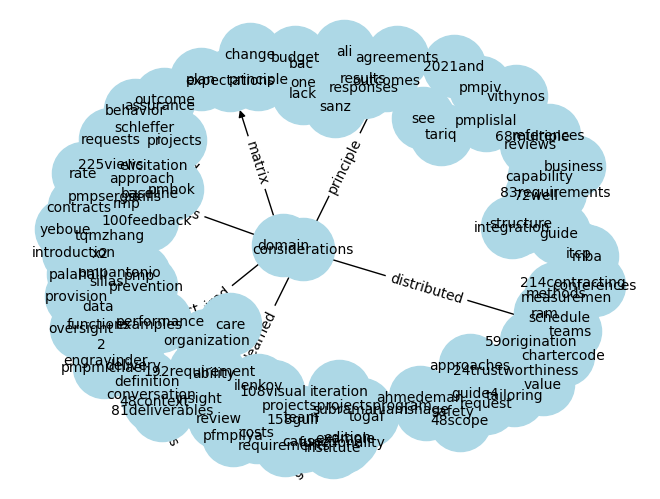

In [ ]:
def visualize_relations(relations):
    G = nx.DiGraph()
    for subject, action, obj in relations:
        G.add_edge(subject, obj, label=action)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
    edge_labels = nx.get_edge_attributes(G, "label")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

visualize_relations(relations)